In [16]:
import pandas as pd
import matplotlib.pyplot as plt

where is the stich controlling file, and how does it look like?

In [17]:
file_ctrl = "../spec/files/generation_script_v1.csv"
df_ctrl = pd.read_csv(file_ctrl)
df_ctrl

,realization_name,Office_Cristina,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,basic_scenario_dir,Office_Cristina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,building_id,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,default_scenario,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,start_date,1/1/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,end_date,12/31/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,scenario_name_1,"""LED Only""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,active_after_1,3/1/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,scenario_name_2,"""All Package""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,active_after_2,7/9/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,scenario_name_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


how to read files that contains timeseries data?
<br>
case 1 = baseline simulation results
<br>
case 2 = synthetic exporter applied but without measures
<br>
case 3 = synthetic exporter applied with several measures

In [18]:
file_case1 = "Case1_Baseline_v0_BaselineScenario.csv"
file_case2 = "Case2_StitchedWithoutMeasures.csv"
file_case3 = "Case3_StitchedWithMeasures.csv"

In [19]:
df_case1 = pd.read_csv(file_case1)
df_case2 = pd.read_csv(file_case2, skiprows = 4)
df_case3 = pd.read_csv(file_case3, skiprows = 4)

what are column headers?

In [20]:
df_case1.columns

Index(['Electricity', 'Natural Gas', 'District Cooling', 'District Heating'], dtype='object')

In [21]:
df_case2.columns

Index(['Timestamp', 'Building_Id_1_Electricity_[J]',
       'Building_Id_1_NaturalGas_[J]', 'Scenario'],
      dtype='object')

In [22]:
df_case3.columns

Index(['Timestamp', 'Building_Id_1_Electricity_[J]',
       'Building_Id_1_NaturalGas_[J]', 'Scenario'],
      dtype='object')

how to combine all files into one data frame?

In [23]:
df_combined_elec = pd.DataFrame()
df_combined_ng = pd.DataFrame()

In [24]:
df_combined_elec.insert(0, 'Timestamp', df_case2.Timestamp)
df_combined_elec.insert(1, 'Baseline_elec', df_case1.Electricity)
df_combined_elec.insert(2, 'Stitched1_elec', df_case2["Building_Id_1_Electricity_[J]"])
df_combined_elec.insert(3, 'Stitched2_elec', df_case3["Building_Id_1_Electricity_[J]"])
df_combined_ng.insert(0, 'Timestamp', df_case2.Timestamp)
df_combined_ng.insert(1, 'Baseline_elec', df_case1["Natural Gas"])
df_combined_ng.insert(2, 'Stitched1_elec', df_case2["Building_Id_1_NaturalGas_[J]"])
df_combined_ng.insert(3, 'Stitched2_elec', df_case3["Building_Id_1_NaturalGas_[J]"])

In [25]:
df_combined_elec

,Timestamp,Baseline_elec,Stitched1_elec,Stitched2_elec
0,01/01/2017 00:00,2.008762e+08,2.008762e+08,2.008762e+08
1,01/01/2017 01:00,2.032282e+08,2.032282e+08,2.032282e+08
2,01/01/2017 02:00,1.884940e+08,1.884940e+08,1.884940e+08
3,01/01/2017 03:00,2.033082e+08,2.033082e+08,2.033082e+08
4,01/01/2017 04:00,2.032714e+08,2.032714e+08,2.032714e+08
5,01/01/2017 05:00,2.145828e+08,2.145828e+08,2.145828e+08
6,01/01/2017 06:00,2.314379e+08,2.314379e+08,2.314379e+08
7,01/01/2017 07:00,3.492117e+08,3.492117e+08,3.492117e+08
8,01/01/2017 08:00,8.270083e+08,8.270083e+08,8.270083e+08
9,01/01/2017 09:00,8.268421e+08,8.268421e+08,8.268421e+08


how to set Timestamp column as index column?

In [26]:
df_combined_elec["Timestamp"] = pd.to_datetime(df_combined_elec["Timestamp"])
df_combined_ng["Timestamp"] = pd.to_datetime(df_combined_ng["Timestamp"])

In [27]:
df_combined_elec.index = df_combined_elec["Timestamp"]
del df_combined_elec["Timestamp"]

In [28]:
df_combined_ng.index = df_combined_ng["Timestamp"]
del df_combined_ng["Timestamp"]

how to ploy the entire simulation period?

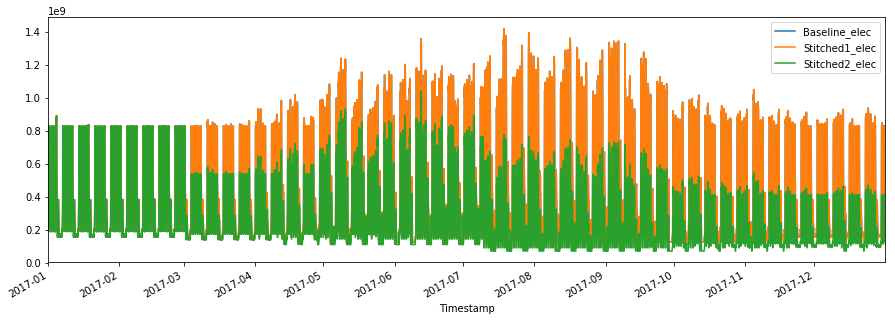

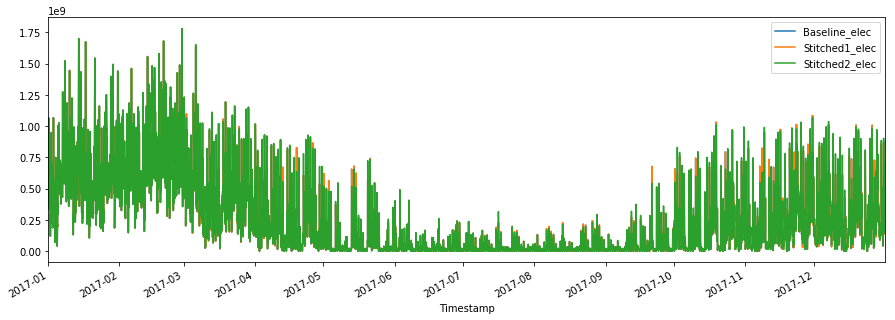

In [33]:
df_combined_elec.plot(figsize=(15,5))
df_combined_ng.plot(figsize=(15,5))

how to plot certain time period? for "LED only" scenario.

In [34]:
df_filtered_elec = df_combined_elec['2/1/2017':'3/31/2017']
df_filtered_ng = df_combined_ng['2/1/2017':'3/31/2017']

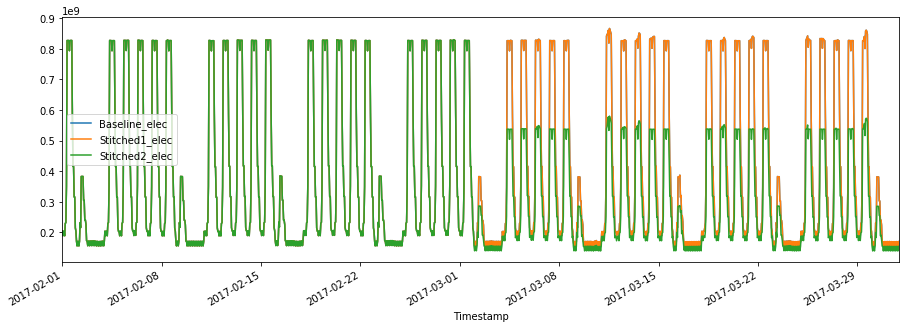

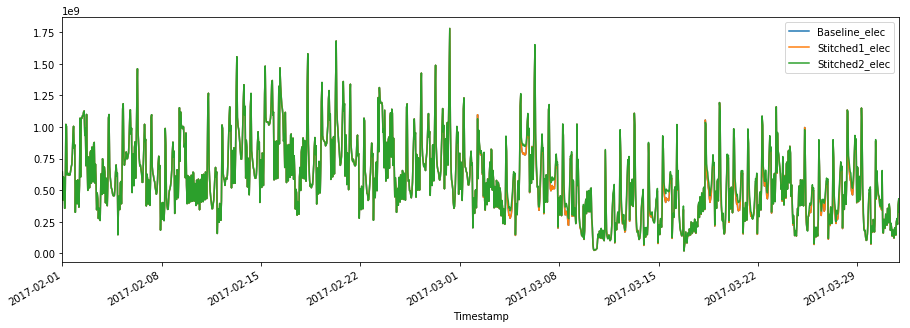

In [35]:
df_filtered_elec.plot(figsize=(15,5))
df_filtered_ng.plot(figsize=(15,5))

how to plot certain time period? for "All package" scenario.

In [36]:
df_filtered_elec = df_combined_elec['6/1/2017':'7/31/2017']
df_filtered_ng = df_combined_ng['6/1/2017':'7/31/2017']

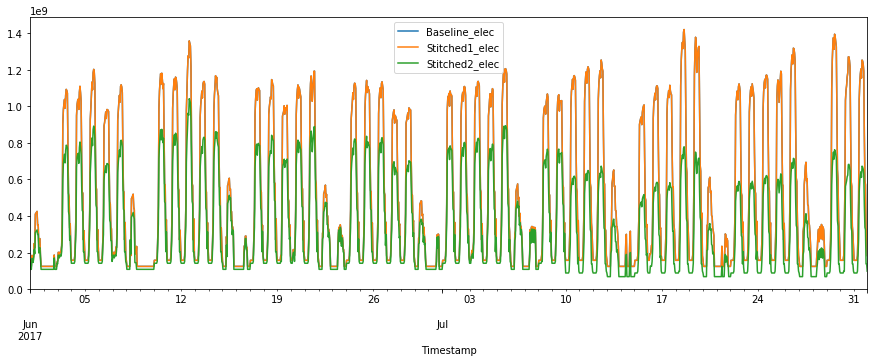

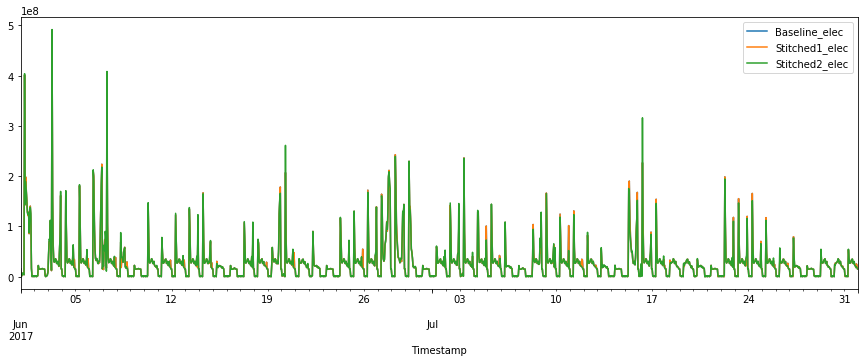

In [37]:
df_filtered_elec.plot(figsize=(15,5))
df_filtered_ng.plot(figsize=(15,5))